# Basic Testing

In this notebook we test that the main files work well.

## Setup

In [1]:
from imports import *
from agents import BetaAgent
from model import Model

## Try with variance

In [2]:
n_agents = 100
my_network = nx.gnp_random_graph(n_agents, p=0.2, directed=True) #nx.complete_graph(n_agents, create_using=nx.DiGraph())

In [3]:
seed=420
my_model = Model(my_network, n_experiments=10, uncertainty=0.001,
                 histories=True,sampling_update=True,variance_stopping = True,directed_network = True,
                 seed=seed,seeded=False, agent_class=BetaAgent)
my_model.run_simulation(number_of_steps=10000,show_bar=True) #number_of_steps is a max amount\n",
print('steps: ',my_model.n_steps)
print('conclusion: ',my_model.conclusion)
df = pd.DataFrame(my_model.agent_histories)
df.head(3)

  0%|          | 11/10000 [00:01<20:05,  8.28it/s]

steps:  12
conclusion:  0.45


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,"[0.5302201846639584, 0.45256185613172334]","[0.5611638072656115, 0.45256185613172334]","[0.5611638072656115, 0.47067099863883777]","[0.5292754856914298, 0.47067099863883777]","[0.5292754856914298, 0.48121095508472367]","[0.5293928809056735, 0.48121095508472367]","[0.5293928809056735, 0.5308311104758614]","[0.5420797245435091, 0.5308311104758614]","[0.5420797245435091, 0.5208876985284161]","[0.5056246385445496, 0.5208876985284161]",...,"[0.5046175088150291, 0.5002405646336238]","[0.5046175088150291, 0.4849972235724757]","[0.514943037376272, 0.4849972235724757]","[0.514943037376272, 0.5008263903512605]","[0.5123983456966729, 0.5008263903512605]","[0.5123983456966729, 0.5017011909445371]","[0.5332638372165569, 0.5017011909445371]","[0.5332638372165569, 0.4924677628944075]","[0.5326657971609915, 0.4924677628944075]","[0.5326657971609915, 0.47789299915056355]"
1,"[0.9587342956873306, 0.06434192641604213]","[0.3318492749241392, 0.06434192641604213]","[0.3318492749241392, 0.43893080786628064]","[0.46105909584870286, 0.43893080786628064]","[0.46105909584870286, 0.4923267893946987]","[0.4671024570665196, 0.4923267893946987]","[0.4671024570665196, 0.5508112096496603]","[0.5358130271543421, 0.5508112096496603]","[0.5358130271543421, 0.5529171820957468]","[0.501598777127689, 0.5529171820957468]",...,"[0.5132660755873981, 0.5116932161592591]","[0.5132660755873981, 0.48535545017775233]","[0.49608584146265966, 0.48535545017775233]","[0.49608584146265966, 0.5144669763722269]","[0.47338559145163883, 0.5144669763722269]","[0.47338559145163883, 0.5208727698955594]","[0.4883435722760682, 0.5208727698955594]","[0.4883435722760682, 0.4850723648274853]","[0.4932498964583603, 0.4850723648274853]","[0.4932498964583603, 0.5178008553519504]"
2,"[0.8999559548446172, 0.7216598988794826]","[0.40278869577472315, 0.7216598988794826]","[0.40278869577472315, 0.44842755339317175]","[0.5871808672050696, 0.44842755339317175]","[0.5871808672050696, 0.6501777321035981]","[0.5099892432716316, 0.6501777321035981]","[0.5099892432716316, 0.5003689943737062]","[0.4512830767939259, 0.5003689943737062]","[0.4512830767939259, 0.5130868713147844]","[0.5147873096643034, 0.5130868713147844]",...,"[0.5076040299071668, 0.5026002449854922]","[0.5076040299071668, 0.4960820995695453]","[0.49826487807454417, 0.4960820995695453]","[0.49826487807454417, 0.5096321672812588]","[0.5057997212036841, 0.5096321672812588]","[0.5057997212036841, 0.4632975717823177]","[0.5194636960826288, 0.4632975717823177]","[0.5194636960826288, 0.4652505830321198]","[0.49162423996216936, 0.4652505830321198]","[0.49162423996216936, 0.5035973989556927]"


In [4]:
my_model.init_agents_alphas_betas

[array([[2.70096642, 2.50351194],
        [3.75834151, 3.58430353]]),
 array([[2.3536573 , 2.74570166],
        [0.41827748, 3.73631063]]),
 array([[2.47349028, 0.81977645],
        [1.45981775, 3.01269277]]),
 array([[2.15503896, 1.64167526],
        [0.29083855, 1.28596005]]),
 array([[0.18952076, 3.56120069],
        [2.08688939, 3.49611858]]),
 array([[2.6683257 , 3.70972225],
        [0.63258337, 0.9246103 ]]),
 array([[0.57768822, 0.73045217],
        [3.23406739, 2.07319726]]),
 array([[0.50872183, 0.30902427],
        [3.48770068, 3.9978062 ]]),
 array([[3.32371398, 1.86625699],
        [0.86717533, 0.84237333]]),
 array([[1.79492428, 3.44929729],
        [0.25562628, 3.38485341]]),
 array([[2.60011679, 3.53027223],
        [3.193342  , 0.54469324]]),
 array([[1.44996706, 2.67279564],
        [2.85268101, 2.95379739]]),
 array([[3.78314644, 1.1772909 ],
        [2.98926974, 0.31824179]]),
 array([[3.39645565, 3.31518316],
        [1.90566251, 3.61632715]]),
 array([[2.13851819,

/var/folders/f5/dc26gyt54fs5nkjnk09tb5rw0000gp/T/ipykernel_71326/4148286619.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  x_means = df.applymap(lambda pair: pair[0]).mean()
/var/folders/f5/dc26gyt54fs5nkjnk09tb5rw0000gp/T/ipykernel_71326/4148286619.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_means = df.applymap(lambda pair: pair[1]).mean()


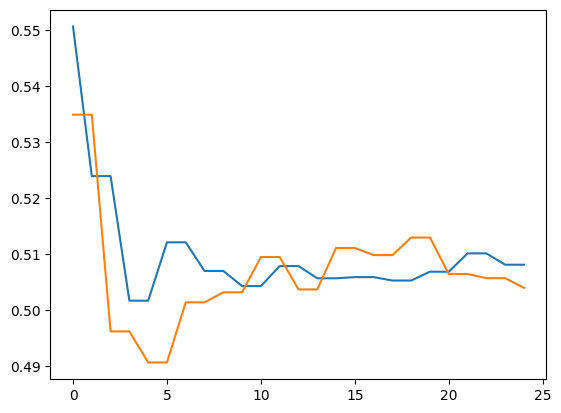

In [5]:
#Extract the first coordinate (x) for each pair and calculate column-wise mean
x_means = df.applymap(lambda pair: pair[0]).mean()
y_means = df.applymap(lambda pair: pair[1]).mean()
plt.plot(x_means)
plt.plot(y_means)

/var/folders/f5/dc26gyt54fs5nkjnk09tb5rw0000gp/T/ipykernel_71326/44276281.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  x_values = df.applymap(lambda pair: pair[0])


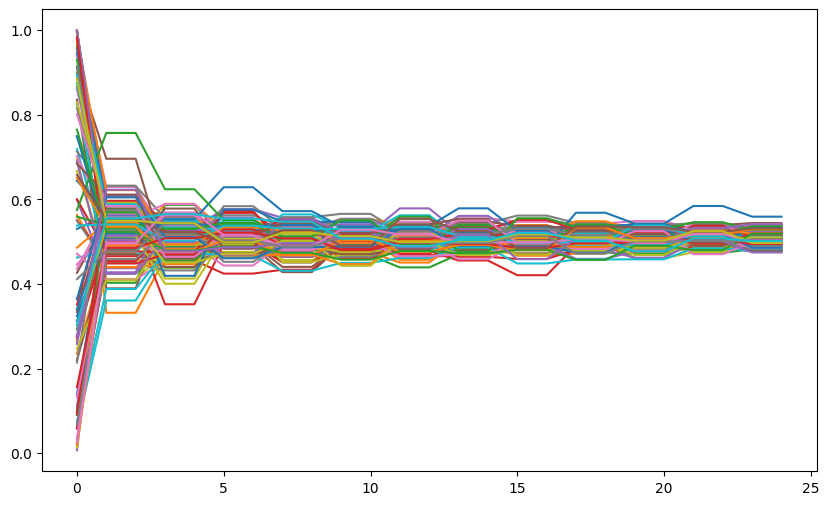

In [6]:
# Extract the first coordinate (x) for each pair
x_values = df.applymap(lambda pair: pair[0])

# Plot the first coordinate for each row
plt.figure(figsize=(10, 6))
for row_idx in range(x_values.shape[0]):
    plt.plot(x_values.columns, x_values.iloc[row_idx, :], label=f'Row {row_idx+1}' if row_idx < 5 else None)

## Try without variance

In [7]:
# n_agents = 100
# my_network = nx.gnp_random_graph(n_agents, p=0.2, directed=True) #nx.complete_graph(n_agents, create_using=nx.DiGraph())

In [8]:
seed=420
my_model = Model(my_network, n_experiments=10, uncertainty=0.001,
                 histories=True,sampling_update=True,variance_stopping = True,directed_network = True,
                 seed=seed,seeded=False, agent_class=BetaAgent)

my_model.run_simulation(number_of_steps=10000,show_bar=True) #number_of_steps is a max amount\n",
print('steps: ',my_model.n_steps)
print('conclusion: ',my_model.conclusion)
df = pd.DataFrame(my_model.agent_histories)
df.head(3)

  0%|          | 9/10000 [00:01<18:38,  8.93it/s]

steps:  10
conclusion:  0.56


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,"[1.3531881828362434e-12, 0.1337710050875578]","[0.4485802460164086, 0.1337710050875578]","[0.4485802460164086, 0.5065428562747541]","[0.4917525513516012, 0.5065428562747541]","[0.4917525513516012, 0.49995191556199886]","[0.4902999627969575, 0.49995191556199886]","[0.4902999627969575, 0.5087565579607787]","[0.5066291899635139, 0.5087565579607787]","[0.5066291899635139, 0.5099424128581735]","[0.5075672611721548, 0.5099424128581735]",...,"[0.5340603850401794, 0.4820622363313451]","[0.5340603850401794, 0.49616803246230645]","[0.49690590151950215, 0.49616803246230645]","[0.49690590151950215, 0.47627970371876843]","[0.4959573880023359, 0.47627970371876843]","[0.4959573880023359, 0.4776243281724362]","[0.49692927760173, 0.4776243281724362]","[0.49692927760173, 0.5086460378121774]","[0.5099293748855935, 0.5086460378121774]","[0.5099293748855935, 0.5020005892637351]"
1,"[0.09454094155063492, 0.23944195892938142]","[0.6490946515577029, 0.23944195892938142]","[0.6490946515577029, 0.46268048471656426]","[0.43609093619118433, 0.46268048471656426]","[0.43609093619118433, 0.41081509270956124]","[0.5429468994901667, 0.41081509270956124]","[0.5429468994901667, 0.56316393415335]","[0.44375418242648773, 0.56316393415335]","[0.44375418242648773, 0.5104829524279573]","[0.520022764189213, 0.5104829524279573]",...,"[0.4799369937149026, 0.5392624129620975]","[0.4799369937149026, 0.46850976952085466]","[0.48899335132344246, 0.46850976952085466]","[0.48899335132344246, 0.5048414386305126]","[0.48965859534831935, 0.5048414386305126]","[0.48965859534831935, 0.5333220463138088]","[0.5225036998592651, 0.5333220463138088]","[0.5225036998592651, 0.5143037192831352]","[0.5081834854626263, 0.5143037192831352]","[0.5081834854626263, 0.4974099177900338]"
2,"[0.9716628858103291, 0.9956553010130408]","[0.3245241103595437, 0.9956553010130408]","[0.3245241103595437, 0.48022636383230516]","[0.41195340544499665, 0.48022636383230516]","[0.41195340544499665, 0.4741867429955214]","[0.42138575586260407, 0.4741867429955214]","[0.42138575586260407, 0.47112440608261996]","[0.4125723139288335, 0.47112440608261996]","[0.4125723139288335, 0.5326716834372426]","[0.4817122232019996, 0.5326716834372426]",...,"[0.49369238494699175, 0.5138933269631235]","[0.49369238494699175, 0.5286428319987296]","[0.46652555642244403, 0.5286428319987296]","[0.46652555642244403, 0.5155675282844063]","[0.4401822427661392, 0.5155675282844063]","[0.4401822427661392, 0.5145884891991422]","[0.483484955043708, 0.5145884891991422]","[0.483484955043708, 0.5058523543211405]","[0.517161543579709, 0.5058523543211405]","[0.517161543579709, 0.49218888982121867]"


/var/folders/f5/dc26gyt54fs5nkjnk09tb5rw0000gp/T/ipykernel_71326/4148286619.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  x_means = df.applymap(lambda pair: pair[0]).mean()
/var/folders/f5/dc26gyt54fs5nkjnk09tb5rw0000gp/T/ipykernel_71326/4148286619.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_means = df.applymap(lambda pair: pair[1]).mean()


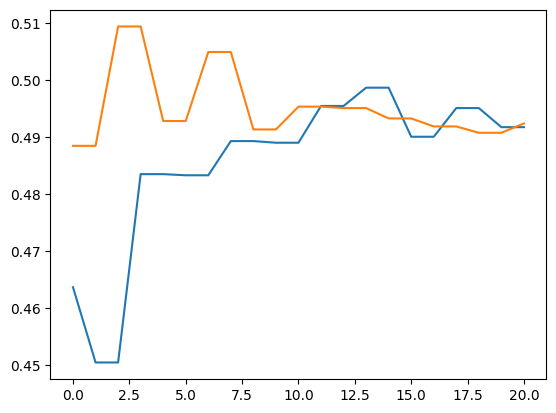

In [9]:
#Extract the first coordinate (x) for each pair and calculate column-wise mean
x_means = df.applymap(lambda pair: pair[0]).mean()
y_means = df.applymap(lambda pair: pair[1]).mean()
plt.plot(x_means)
plt.plot(y_means)

/var/folders/f5/dc26gyt54fs5nkjnk09tb5rw0000gp/T/ipykernel_71326/44276281.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  x_values = df.applymap(lambda pair: pair[0])


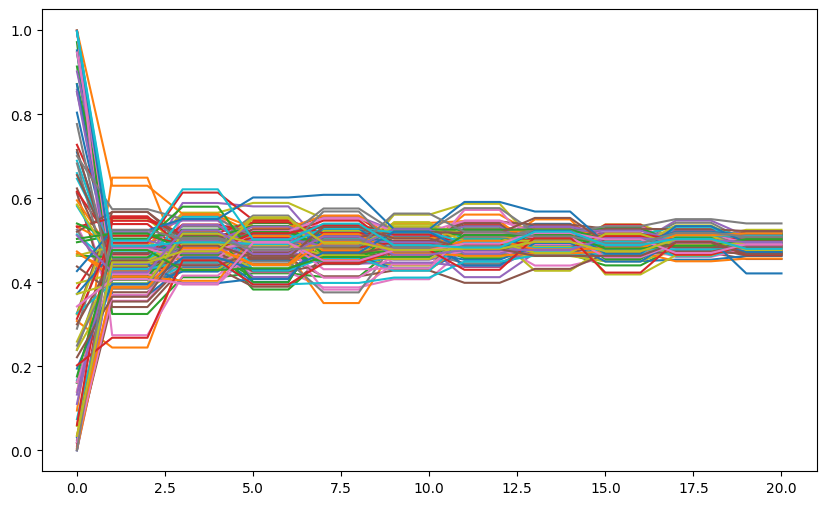

In [10]:
# Extract the first coordinate (x) for each pair
x_values = df.applymap(lambda pair: pair[0])

# Plot the first coordinate for each row
plt.figure(figsize=(10, 6))
for row_idx in range(x_values.shape[0]):
    plt.plot(x_values.columns, x_values.iloc[row_idx, :], label=f'Row {row_idx+1}' if row_idx < 5 else None)